In [91]:
#1 Set up the Database:
import sqlite3
connection = sqlite3.connect('student_grades.db')
print("Database created and connected!")

cursor = connection.cursor()
print("Cursor created!")

Database created and connected!
Cursor created!


In [92]:
# 2 Create Students Table
cursor.execute('''CREATE TABLE IF NOT EXISTS Students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Students table created!


In [93]:
#2 Create Grades Table
cursor.execute('''CREATE TABLE IF NOT EXISTS Grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY ('student_id') REFERENCES Students(student_id)

)
''')

print("Grades table created!")

connection.commit()

Grades table created!


In [94]:
#3 Insert Data Into Students Table
student_data = [
    ('Alice','Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('Divid', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('INSERT INTO Students (first_name, last_name) VALUES (?, ?)', student_data)
print("Students data inserted!")

connection.commit()

Students data inserted!


In [95]:
#3 Insert Data Into Grades Table
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 87),
    (3, 'English', 66),
    (3, 'History', 90),
    (4, 'Math', 54),
    (4, 'English', 99),
    (4, 'History', 73),
    (5, 'Math', 98),
    (5, 'English', 100),
    (5, 'History', 87)

]

cursor.executemany('INSERT INTO Grades(student_id, subject, grade) VALUES (?, ?, ?)', grades_data)
print("grades data inserted!")

connection.commit()

grades data inserted!


In [96]:
#4.1 Retrieve all Students Names and Their Grades
cursor.execute('''
SELECT Students.first_name, Students.last_name, Grades.subject, Grades.grade
FROM Students
JOIN Grades ON Students.student_id = grades.student_id
''')

students_grades = cursor.fetchall()
for student in students_grades:
    print(student)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 87)
('Carol', 'White', 'English', 66)
('Carol', 'White', 'History', 90)
('Divid', 'Brown', 'Math', 54)
('Divid', 'Brown', 'English', 99)
('Divid', 'Brown', 'History', 73)
('Eve', 'Davis', 'Math', 98)
('Eve', 'Davis', 'English', 100)
('Eve', 'Davis', 'History', 87)


In [97]:
#4.2 Find the average grade for each student.
cursor.execute('''
SELECT Students.first_name, AVG(Grades.grade)
FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
GROUP BY Students.student_id
''')

avg_grades = cursor.fetchall()
for student in avg_grades:
    print(student)

('Alice', 91.0)
('Bob', 81.0)
('Carol', 81.0)
('Divid', 75.33333333333333)
('Eve', 95.0)


In [98]:
#4.3 Find the student with the highest average grade
cursor.execute('''
SELECT Students.first_name, AVG(Grades.grade) AS avg_grade
FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
GROUP BY Students.student_id
ORDER BY avg_grade DESC
LIMIT 1
''')

top_student = cursor.fetchone()
print(top_student)

('Eve', 95.0)


In [99]:
#4.4 Find the average grade for the Math subject
cursor.execute('''
SELECT AVG(Grades.grade)
FROM Grades
WHERE Grades.subject = 'Math'
''')

avg_math_grade = cursor.fetchone()
print(avg_math_grade)

(85.55555555555556,)


In [100]:
#4.5 List all students who scored above 90 in any subject.
cursor.execute('''
SELECT Students.first_name, Grades.subject, Grades.grade
FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
WHERE Grades.grade > 90
''')

above90 = cursor.fetchall()
for student in above90:
    print(student)

('Alice', 'Math', 95)
('Alice', 'Math', 95)
('Divid', 'English', 99)
('Eve', 'Math', 98)
('Eve', 'English', 100)


In [101]:
#5.1 Use Pandas to load the data from the students and grades tables into DataFrames.
#5.2 Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade
connection = sqlite3.connect('student_grades.db')
join = ('''
SELECT Students.first_name, Students.last_name, Grades.subject, Grades.grade
FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
''')
import pandas as pd
df = pd.read_sql_query(join, connection)
print(df)



   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Alice   Johnson     Math     95
7       Alice   Johnson  English     88
8       Alice   Johnson  History     90
9         Bob     Smith     Math     82
10        Bob     Smith  English     76
11        Bob     Smith  History     85
12      Carol     White     Math     87
13      Carol     White  English     66
14      Carol     White  History     90
15      Divid     Brown     Math     54
16      Divid     Brown  English     99
17      Divid     Brown  History     73
18        Eve     Davis     Math     98
19        Eve     Davis  English    100
20        Eve     Davis  History     87


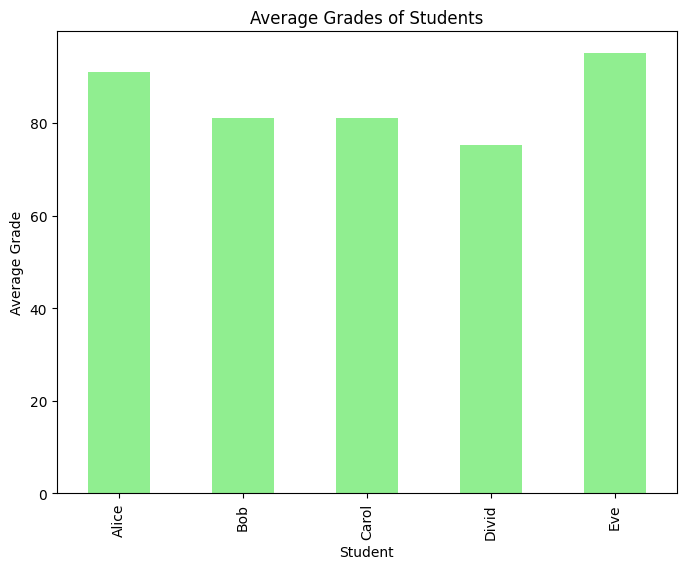

In [103]:
#5.3 Plot the average grades for each student
import matplotlib.pyplot as plt

student_avg_grades = df.groupby('first_name')['grade'].mean()
plt.figure(figsize=(8, 6))
student_avg_grades.plot(kind='bar', color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades of Students')
plt.show()

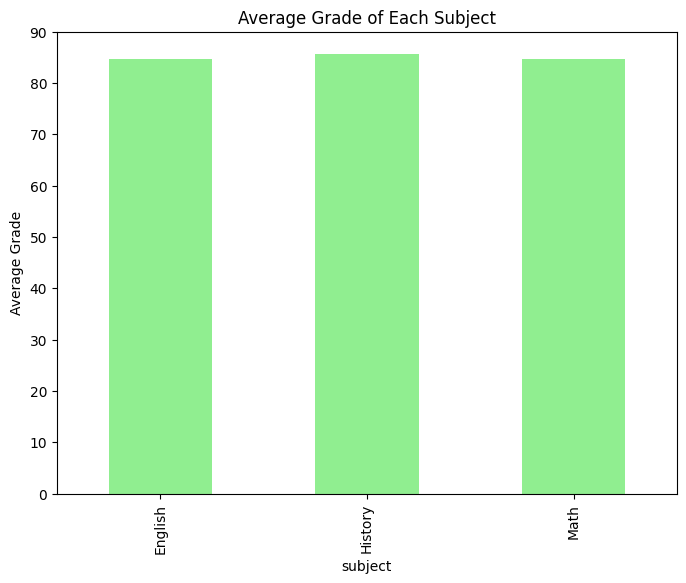

In [105]:
#5.3 Create a bar chart showing the average grade for each subject
import matplotlib.pyplot as plt

subject_avg_grades = df.groupby('subject')['grade'].mean()
plt.figure(figsize=(8, 6))
subject_avg_grades.plot(kind='bar', color='lightgreen')
plt.xlabel('subject')
plt.ylabel('Average Grade')
plt.title('Average Grade of Each Subject')
plt.show()